In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Hypothetically loading a dataset
data = pd.read_csv('sustainability_data.csv')

data.head()

,Year,Energy_Consumption,Renewable_Percentage,GDP,CO2_Emissions
0,2000,517,13.823292,985,816.163479
1,2001,516,24.170636,1334,869.155993
2,2002,468,28.369161,1604,883.858124
3,2003,531,19.401217,1668,947.372230
4,2004,483,26.920520,1254,837.837492


In [3]:
X = data[['Energy_Consumption', 'Renewable_Percentage', 'GDP']]
y = data['CO2_Emissions']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the degree of the polynomial
# You can adjust the degree as needed
poly = PolynomialFeatures(degree=1)  
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [5]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [6]:
# Make predictions
y_pred = model.predict(X_poly_test)

In [7]:
y_pred 

array([ 780.90091007,  883.69258478,  943.82930247,  860.22458687,
       1015.92546691])

In [8]:
# Calculate Mean Squared Error or R² Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 885.6876143441863
R² Score: 0.6480819005240779


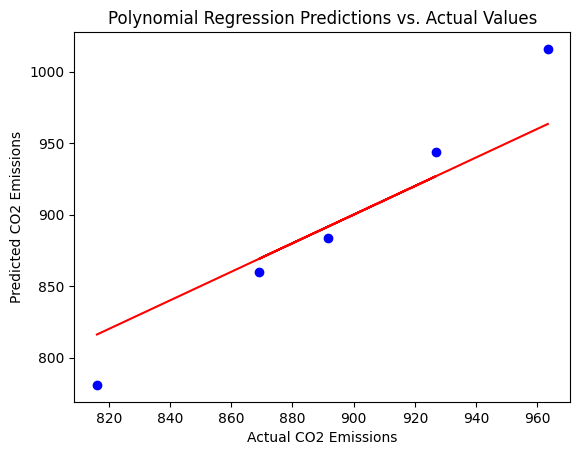

In [9]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')  # 45-degree line
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Polynomial Regression Predictions vs. Actual Values')
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

for degree in range(1, 6):  # Test polynomial degrees from 1 to 5
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    scores = cross_val_score(LinearRegression(), X_poly, y, cv=5, scoring='r2')
    print(f"Degree: {degree}, Mean R-squared: {np.mean(scores)}")

Degree: 1, Mean R-squared: 0.5938933972889533
Degree: 2, Mean R-squared: 0.030097475085214476
Degree: 3, Mean R-squared: -55.26676898589109
Degree: 4, Mean R-squared: -1458.1089975170596
Degree: 5, Mean R-squared: -31.753564895695263


In [11]:
import joblib
# Save the model to a file
joblib.dump(model, 'polynomialRegModel.pkl')

['polynomialRegModel.pkl']